In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime


In [4]:
df = pd.read_csv("/content/customer_segmentation_data.csv")

In [5]:
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04/10/2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11/06/2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06/05/2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09/02/2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09/10/2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


##  Basic info

In [6]:
print("Initial Dataset Info:")
print(df.info())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned        

In [7]:
print("\nInitial Dataset Summary:")
print(df.describe())


Initial Dataset Summary:
         Customer ID           Age   Income Level  Coverage Amount  \
count   53503.000000  53503.000000   53503.000000     53503.000000   
mean    52265.204998     44.140945   82768.324318    492580.789638   
std     28165.000067     15.079486   36651.075670    268405.505571   
min         1.000000     18.000000   20001.000000     50001.000000   
25%     28950.500000     32.000000   51568.500000    249613.500000   
50%     55858.000000     43.000000   80719.000000    477261.000000   
75%     76096.000000     57.000000  115973.500000    739124.000000   
max    100000.000000     70.000000  149999.000000   1000000.000000   

       Premium Amount  
count    53503.000000  
mean      3023.702447  
std       1285.834295  
min        500.000000  
25%       1817.000000  
50%       3194.000000  
75%       4311.500000  
max       5000.000000  


## NO NAN Value

In [8]:
df.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Marital Status,0
Education Level,0
Geographic Information,0
Occupation,0
Income Level,0
Behavioral Data,0
Purchase History,0


In [9]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [10]:
df.select_dtypes(include=['int64', 'float64'])

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
0,84966,23,70541,366603,2749
1,95568,26,54168,780236,1966
2,10544,29,73899,773926,4413
3,77033,20,63381,787815,4342
4,88160,25,38794,366506,1276
...,...,...,...,...,...
53498,44809,35,120850,586401,4404
53499,65485,61,122309,637733,1285
53500,26213,25,49258,631057,4407
53501,63136,42,66301,730385,4482


## Data Types Verification:

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [12]:
df.select_dtypes(include=['object'])

,Gender,Marital Status,Education Level,Geographic Information,Occupation,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,Female,Married,Associate Degree,Mizoram,Entrepreneur,policy5,04/10/2018,Phone,policy2,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,Male,Widowed,Doctorate,Goa,Manager,policy5,11/06/2018,Chat,policy1,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,Female,Single,Associate Degree,Rajasthan,Entrepreneur,policy5,06/05/2021,Email,policy3,Group,Email,Mail,Evening,German,Segment3
3,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,policy5,09/02/2018,Chat,policy2,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,Female,Separated,Bachelor's Degree,West Bengal,Manager,policy1,09/10/2018,Chat,policy4,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,policy3,01/01/2019,Mobile App,policy1,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,policy5,5/18/2021,Mobile App,policy4,Group,Text,Mail,Afternoon,German,Segment1
53500,Male,Divorced,Doctorate,Assam,Teacher,policy2,11/27/2018,In-Person,policy1,Individual,Text,Text,Weekends,French,Segment4
53501,Male,Married,Doctorate,Andhra Pradesh,Artist,policy4,06/04/2021,In-Person,policy1,Business,Mail,Phone,Morning,French,Segment5


In [13]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [14]:
df['Age'].interpolate(method="linear")

,Age
0,23
1,26
2,29
3,20
4,25
...,...
53498,35
53499,61
53500,25
53501,42


In [15]:
df['Age'].isna().sum()

0

In [16]:
df['Purchase History'] = pd.to_datetime(df['Purchase History'], errors='coerce')
df = df.dropna(subset=['Purchase History'])


In [17]:
df = df.reset_index()

In [18]:
df

,index,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,...,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,...,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,...,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,...,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,...,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,...,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,...,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,...,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,...,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,...,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


In [19]:
df['Purchase History'].isnull().sum()

0

## Calculating Purchase Frequency

In [20]:
purchase_frequency = df.groupby('Customer ID').size().reset_index(name='Purchase Frequency')

In [21]:
purchase_frequency

,Customer ID,Purchase Frequency
0,1,34
1,5,1
2,23,1
3,37,1
4,49,1
...,...,...
40254,99772,1
40255,99891,1
40256,99962,1
40257,99988,1


In [22]:
df = df.merge(purchase_frequency, on='Customer ID', how='left')
df

,index,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,...,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group,Purchase Frequency
0,0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,...,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5,1
1,1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,...,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5,1
2,2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,...,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3,2
3,3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,...,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3,1
4,4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,...,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,...,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5,3
53499,53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,...,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1,2
53500,53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,...,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4,1
53501,53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,...,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5,1


In [23]:

policy_weights = {
    'policy1': 1,
    'policy2': 2,
    'policy3': 3,
    'policy4': 4,
    'policy5': 5,
}

df['Policy Score'] = df['Insurance Products Owned'].map(policy_weights)
policy_weights = {"Individual": 1, "Group": 2, "Family": 3, "Business": 4}

df["Policy Type Weight"] = df["Policy Type"].map(policy_weights)

today = datetime.now()
df["Days Since Purchase"] = (today - pd.to_datetime(df["Purchase History"])).dt.days
df["Purchase Recency Score"] = 1 / (1 + df["Days Since Purchase"])

w1, w2, w3, w4 = 0.3, 0.3, 0.2, 0.2

df["Instance Spending Score"] = (
    w1 * (df["Premium Amount"] / df["Income Level"]) +
    w2 * (df["Coverage Amount"] / df["Income Level"]) +
    w3 * df["Policy Type Weight"] * df["Policy Score"] +
    w4 * df["Purchase Recency Score"]
)

print(df[["Behavioral Data", "Income Level", "Instance Spending Score"]])


      Behavioral Data  Income Level  Instance Spending Score
0             policy5         70541                 2.370879
1             policy5         54168                 4.732179
2             policy5         73899                 4.359897
3             policy5         63381                 4.949588
4             policy1         38794                 5.244203
...               ...           ...                      ...
53498         policy3        120850                 2.066716
53499         policy5        122309                 3.167540
53500         policy2         49258                 4.070309
53501         policy4         66301                 4.125296
53502         policy2        136632                 2.042098

[53503 rows x 3 columns]


In [24]:
mean_spending_score = df.groupby('Customer ID')['Instance Spending Score'].mean().reset_index()
mean_spending_score

,Customer ID,Instance Spending Score
0,1,3.911669
1,5,2.101895
2,23,3.714232
3,37,2.208263
4,49,3.903444
...,...,...
40254,99772,1.611905
40255,99891,0.860059
40256,99962,4.044201
40257,99988,1.915511


In [25]:
df = df.merge(mean_spending_score, on='Customer ID', how='left')
df.rename(columns={'Instance Spending Score_y': 'Spending Score'}, inplace=True)
df.rename(columns={'Instance Spending Score_x': 'Instance Spending Score'}, inplace=True)
df

,index,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,...,Preferred Contact Time,Preferred Language,Segmentation Group,Purchase Frequency,Policy Score,Policy Type Weight,Days Since Purchase,Purchase Recency Score,Instance Spending Score,Spending Score
0,0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,...,Afternoon,English,Segment5,1,2,2,2433,0.000411,2.370879,2.370879
1,1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,...,Morning,French,Segment5,1,1,2,2223,0.000450,4.732179,4.732179
2,2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,...,Evening,German,Segment3,2,3,2,1281,0.000780,4.359897,4.087728
3,3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,...,Anytime,French,Segment3,1,2,3,2288,0.000437,4.949588,4.949588
4,4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,...,Weekends,English,Segment2,4,4,3,2280,0.000438,5.244203,3.795932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,...,Afternoon,German,Segment5,3,1,3,2167,0.000461,2.066716,3.403419
53499,53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,...,Afternoon,German,Segment1,2,4,2,1299,0.000769,3.167540,1.971702
53500,53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,...,Weekends,French,Segment4,1,1,1,2202,0.000454,4.070309,4.070309
53501,53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,...,Morning,French,Segment5,1,1,4,1282,0.000779,4.125296,4.125296


## Duplicate Removal

In [26]:
df.duplicated(subset="Customer ID").sum()

13244

In [27]:
without_dup_df = df.drop_duplicates(subset="Customer ID",keep="first")

In [28]:
without_dup_df

,index,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,...,Preferred Contact Time,Preferred Language,Segmentation Group,Purchase Frequency,Policy Score,Policy Type Weight,Days Since Purchase,Purchase Recency Score,Instance Spending Score,Spending Score
0,0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,...,Afternoon,English,Segment5,1,2,2,2433,0.000411,2.370879,2.370879
1,1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,...,Morning,French,Segment5,1,1,2,2223,0.000450,4.732179,4.732179
2,2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,...,Evening,German,Segment3,2,3,2,1281,0.000780,4.359897,4.087728
3,3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,...,Anytime,French,Segment3,1,2,3,2288,0.000437,4.949588,4.949588
4,4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,...,Weekends,English,Segment2,4,4,3,2280,0.000438,5.244203,3.795932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53487,53487,87569,47,Male,Married,Doctorate,Telangana,Teacher,109500,policy3,...,Evening,French,Segment5,1,2,3,1676,0.000596,2.614240,2.614240
53490,53490,39601,50,Male,Divorced,Doctorate,Meghalaya,Teacher,88741,policy5,...,Afternoon,French,Segment5,1,4,2,1305,0.000766,3.115653,3.115653
53497,53497,44828,24,Female,Married,Master's Degree,Sikkim,Teacher,121533,policy4,...,Weekends,French,Segment3,1,2,2,906,0.001103,2.052384,2.052384
53500,53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,...,Weekends,French,Segment4,1,1,1,2202,0.000454,4.070309,4.070309


## Demographics

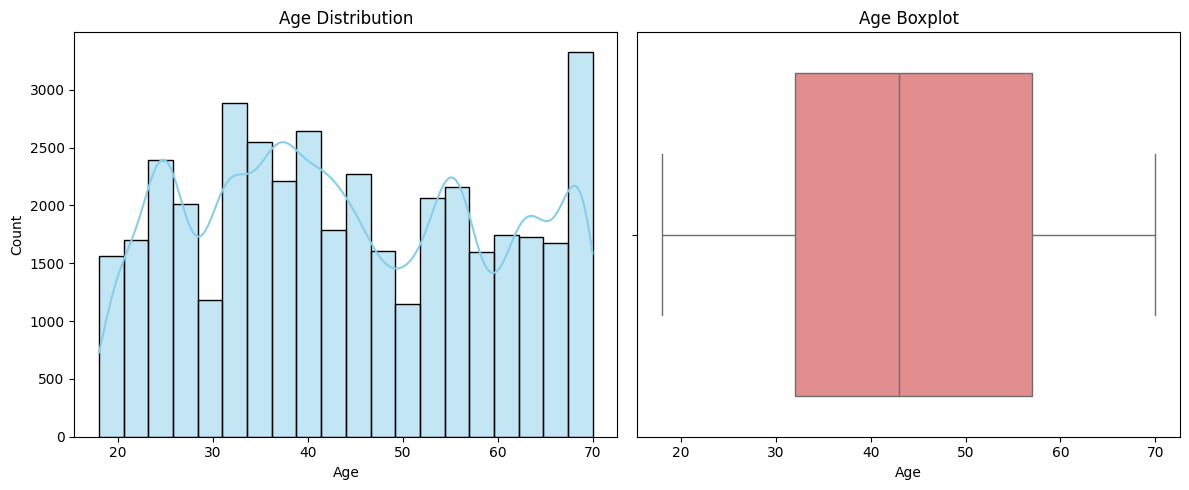

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(without_dup_df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=without_dup_df['Age'], color='lightcoral')
plt.title('Age Boxplot')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

The Above demographic show that


1. **Age Range** of Customer is from **20 to 70**
2. **Major Age Group** of Customer lie in **20s,40s, and early 60s**
3. **Central Age Group (Median)** is around **40 years**
4. The **distribution** is **fairly balanced** across most age groups, with **no extreme outliers**.





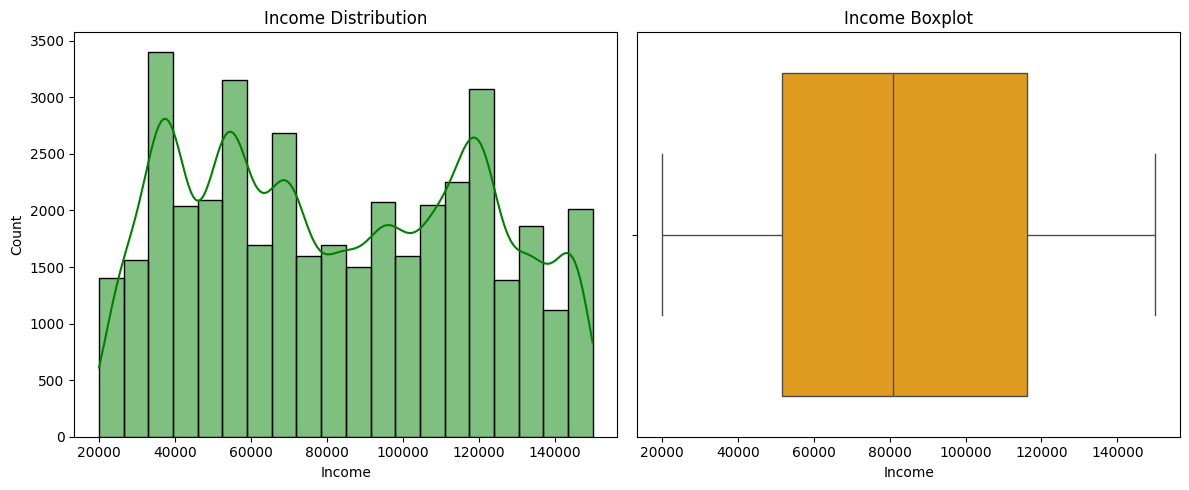

In [30]:
# Visualize Income Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(without_dup_df['Income Level'], kde=True, bins=20, color='green')
plt.title('Income Distribution')
plt.xlabel('Income')

plt.subplot(1, 2, 2)
sns.boxplot(x=without_dup_df['Income Level'], color='orange')
plt.title('Income Boxplot')
plt.xlabel('Income')

plt.tight_layout()
plt.show()

The Above demographic show that

1. **Income Range:** Customers in the dataset have incomes between **20,000 and 140,000.**
2. The **median income** is **approximately 80,000**.
3. The **income distribution** is **relatively uniform**, with **no extreme outliers**.


<ipython-input-31-f074ba2140e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=without_dup_df, palette='pastel')


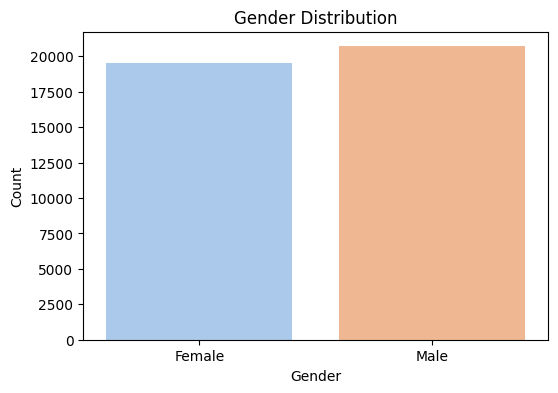

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=without_dup_df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The Above demographic show that

There is **No Significant Differnce** between Number of Male and Female Customer


In [32]:
# Check skewness
print("Age Skewness:", without_dup_df['Age'].skew())
print("Income Skewness:", without_dup_df['Income Level'].skew())

Age Skewness: 0.11452650697808767
Income Skewness: 0.10531483415740785


In [33]:
# Identify outliers using IQR for Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
outliers_age = df[(df['Age'] < Q1_age - 1.5 * IQR_age) | (df['Age'] > Q3_age + 1.5 * IQR_age)]

print("Number of Age Outliers:", len(outliers_age))

Number of Age Outliers: 0


In [34]:
# Identify outliers using IQR for Income
Q1_income = df['Income Level'].quantile(0.25)
Q3_income = df['Income Level'].quantile(0.75)
IQR_income = Q3_income - Q1_income
outliers_income = df[(df['Income Level'] < Q1_income - 1.5 * IQR_income) | (df['Income Level'] > Q3_income + 1.5 * IQR_income)]

print("Number of Income Outliers:", len(outliers_income))

Number of Income Outliers: 0


## Spending Patterns

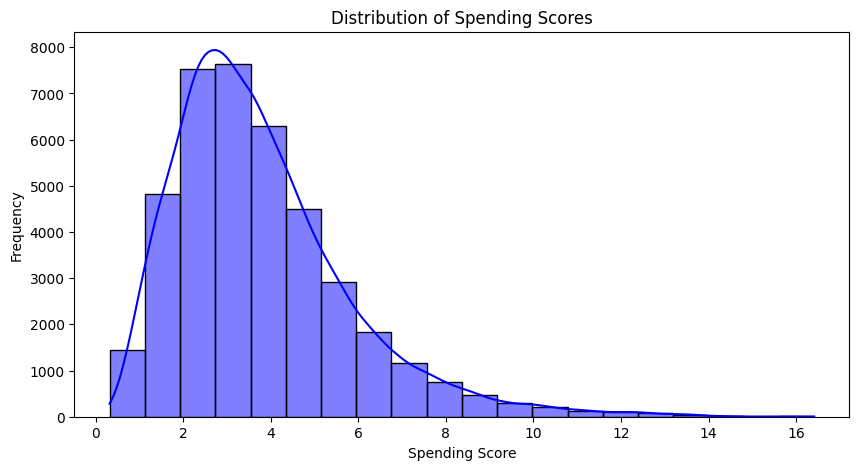

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(data=without_dup_df, x='Spending Score', kde=True, bins=20, color='blue')
plt.title('Distribution of Spending Scores')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

The Above Demographic Shows That:

1. The Spending Score is **Left Skewed** which means most of the customer Spending Score is **less than 7.0**
2. There is **Extreme Values** in **Spending Score**

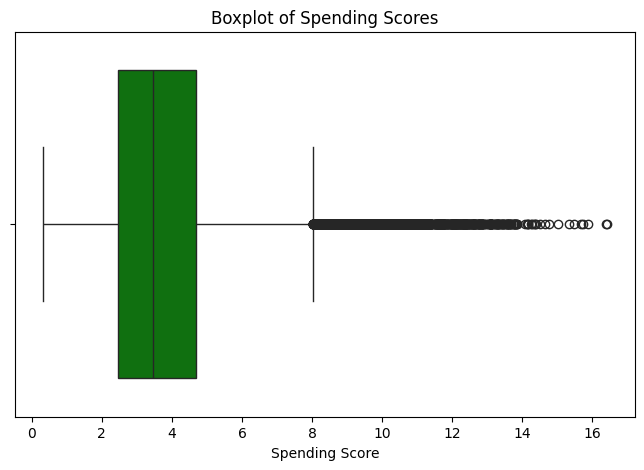

In [36]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Spending Score', color='green')
plt.title('Boxplot of Spending Scores')
plt.xlabel('Spending Score')
plt.show()

The Above Demographic Shows That:

1. The **Median** if the Spending Score is **Approximately 3**
2. The **Whiskers Points** are **0.20 and approx 8**
3. There are Extreme Points at the **Right**



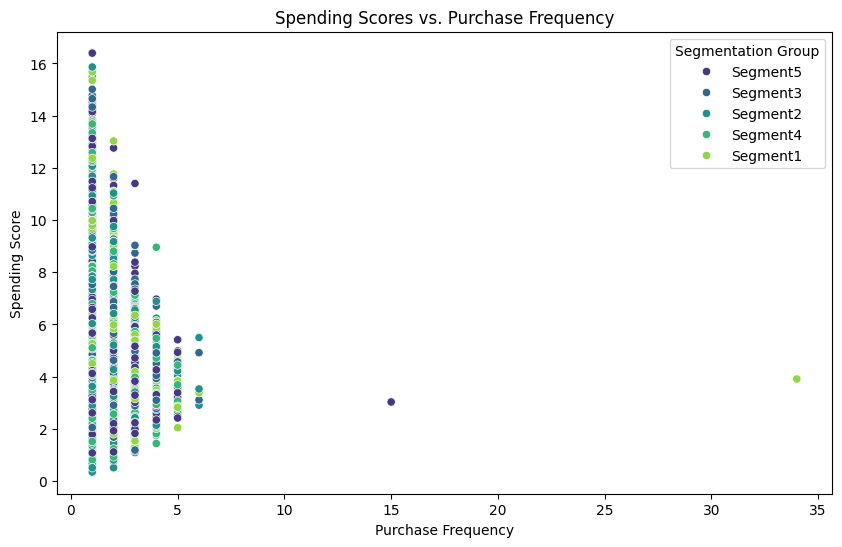

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=without_dup_df, x='Purchase Frequency', y='Spending Score', hue='Segmentation Group', palette='viridis')
plt.title('Spending Scores vs. Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Spending Score')
plt.legend(title='Segmentation Group')
plt.show()

The Above Demographic Shows That


1. The Purchase Frequency Of Customer is **Independent** of Segment






In [38]:
df['Segmentation Group'].unique()

array(['Segment5', 'Segment3', 'Segment2', 'Segment4', 'Segment1'],
      dtype=object)

In [39]:
for i in without_dup_df['Segmentation Group'].unique():
    segment = without_dup_df[without_dup_df['Segmentation Group'] == i][['Customer ID', "Spending Score"]]

    print("=====================================")
    print(f"Number of customers in {i}: {len(segment['Customer ID'].unique())}")
    print("=====================================")

    print("================ Mean ===============")
    print(f"Mean Spending Score: {segment['Spending Score'].mean()}")

    print("================ Median ===============")
    print(f"Median Spending Score: {segment['Spending Score'].median()}")

    # print("================ Mode ===============")
    # print(f"Mode Spending Score: {segment['Spending Score'].mode()}")

    print()


Number of customers in Segment5: 10478
================ Mean ===============
Mean Spending Score: 3.744317579092011
================ Median ===============
Median Spending Score: 3.3407662440050747

Number of customers in Segment3: 6939
================ Mean ===============
Mean Spending Score: 3.7594654761245936
================ Median ===============
Median Spending Score: 3.3615729662863263

Number of customers in Segment2: 8642
================ Mean ===============
Mean Spending Score: 3.7512468565310186
================ Median ===============
Median Spending Score: 3.3677486707639126

Number of customers in Segment4: 7634
================ Mean ===============
Mean Spending Score: 3.8634844702906475
================ Median ===============
Median Spending Score: 3.525425923870274

Number of customers in Segment1: 6566
================ Mean ===============
Mean Spending Score: 3.782722688733182
================ Median ===============
Median Spending Score: 3.402358407050954



<ipython-input-57-fdbe20bb7549>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_data, x="Segmentation Group", y="Number_of_Customers", palette="pastel")


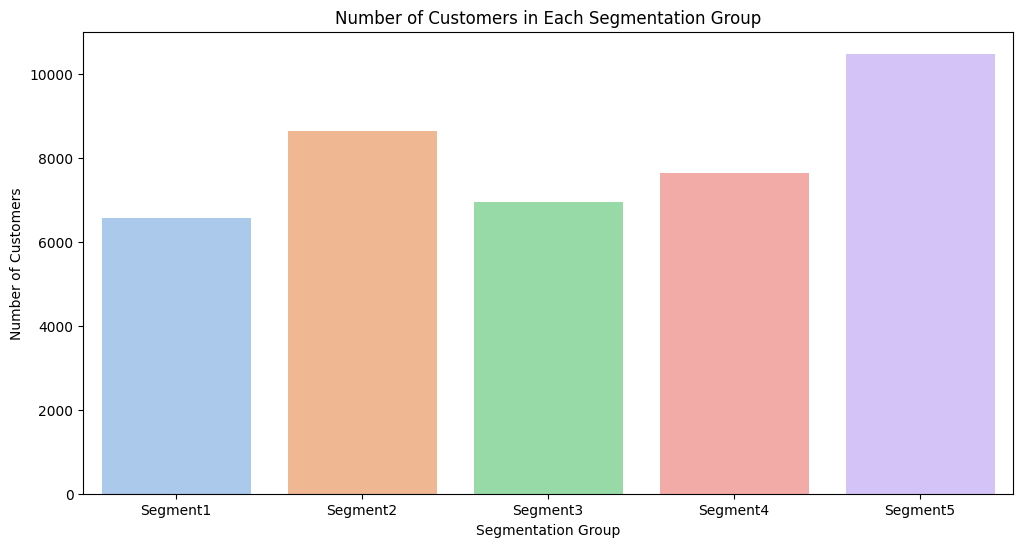

<ipython-input-57-fdbe20bb7549>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_data, x="Segmentation Group", y="Mean_Spending_Score", palette="viridis")


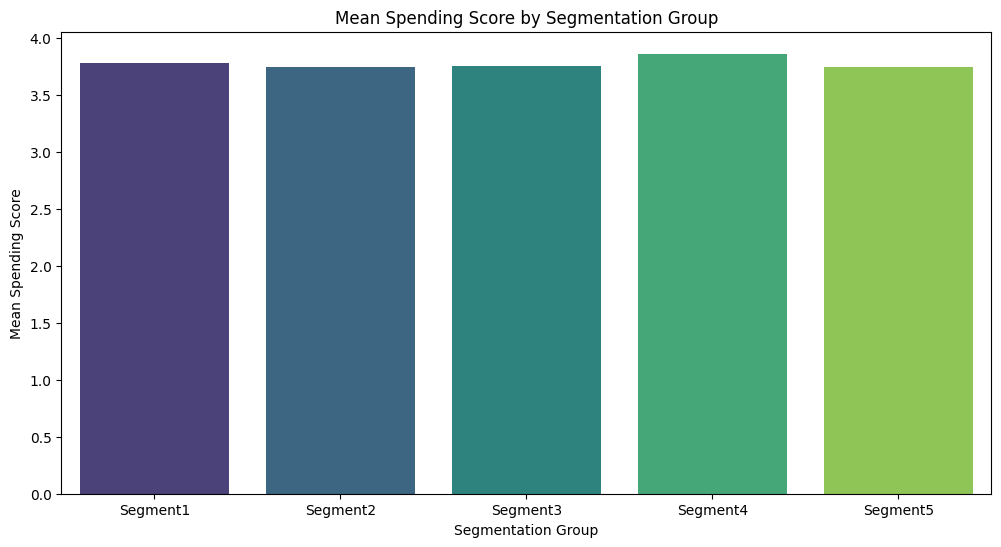

<ipython-input-57-fdbe20bb7549>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_data, x="Segmentation Group", y="Median_Spending_Score", palette="coolwarm")


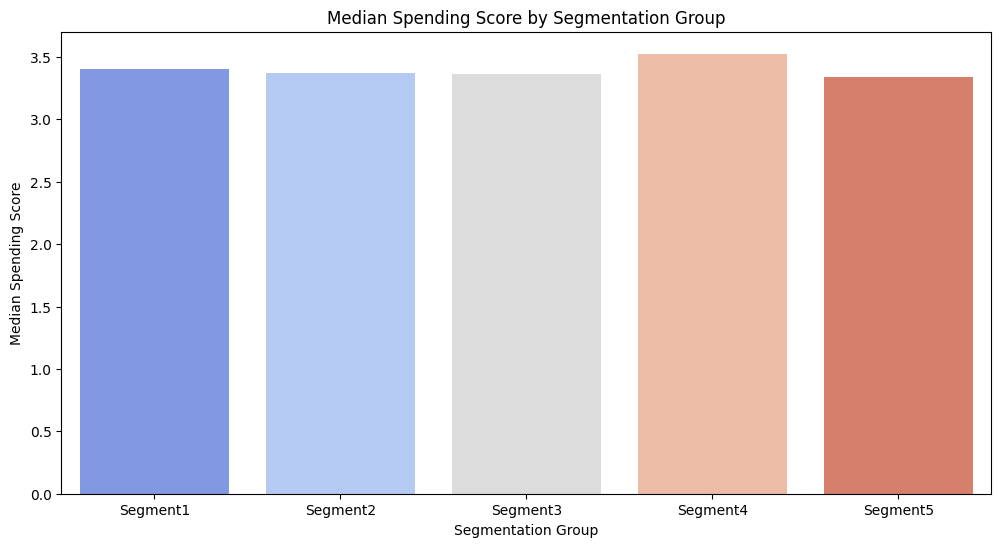

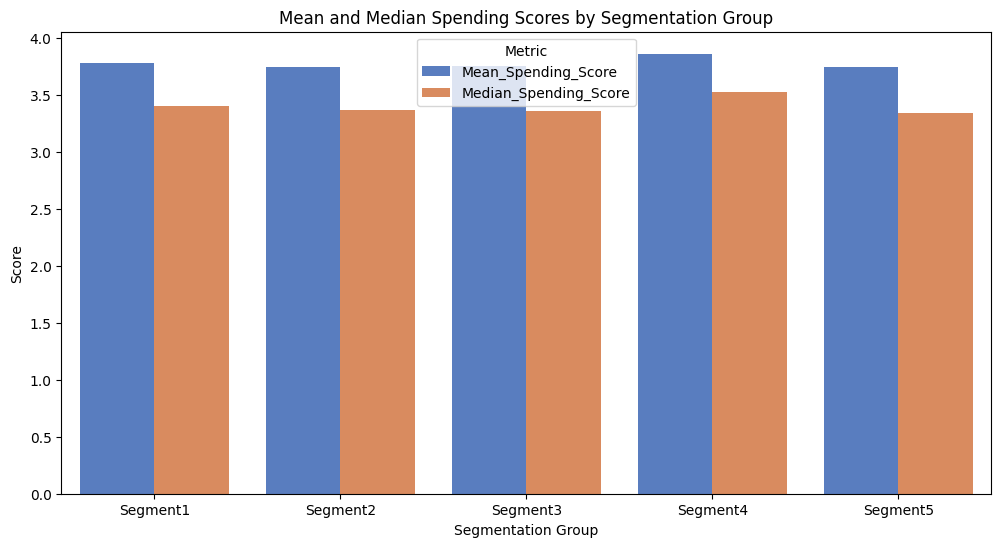

In [57]:
summary_data = (
    without_dup_df.groupby("Segmentation Group")
    .agg(
        Number_of_Customers=("Customer ID", "nunique"),
        Mean_Spending_Score=("Spending Score", "mean"),
        Median_Spending_Score=("Spending Score", "median"),
    )
    .reset_index()
)

# Bar plot for number of customers in each segment
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_data, x="Segmentation Group", y="Number_of_Customers", palette="pastel")
plt.title("Number of Customers in Each Segmentation Group")
plt.xlabel("Segmentation Group")
plt.ylabel("Number of Customers")
plt.show()

# Bar plot for mean spending scores by segment
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_data, x="Segmentation Group", y="Mean_Spending_Score", palette="viridis")
plt.title("Mean Spending Score by Segmentation Group")
plt.xlabel("Segmentation Group")
plt.ylabel("Mean Spending Score")
plt.show()

# Bar plot for median spending scores by segment
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_data, x="Segmentation Group", y="Median_Spending_Score", palette="coolwarm")
plt.title("Median Spending Score by Segmentation Group")
plt.xlabel("Segmentation Group")
plt.ylabel("Median Spending Score")
plt.show()

# Combined view: Grouped bar chart for mean and median spending scores
plt.figure(figsize=(12, 6))
summary_melted = summary_data.melt(
    id_vars="Segmentation Group",
    value_vars=["Mean_Spending_Score", "Median_Spending_Score"],
    var_name="Metric",
    value_name="Score",
)
sns.barplot(data=summary_melted, x="Segmentation Group", y="Score", hue="Metric", palette="muted")
plt.title("Mean and Median Spending Scores by Segmentation Group")
plt.xlabel("Segmentation Group")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()


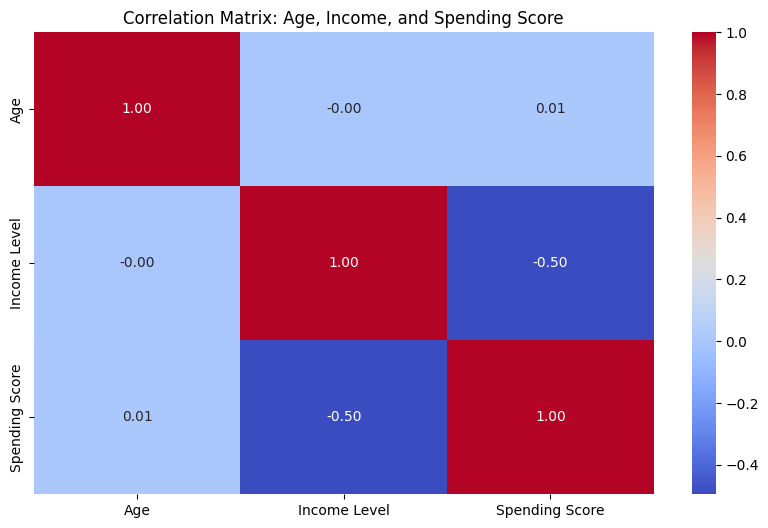

In [40]:
correlation_data = without_dup_df[['Age', 'Income Level', 'Spending Score']]

corr_matrix = correlation_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix: Age, Income, and Spending Score')
plt.show()


The Above Demographic Shows That:


1. Spending Score and Age Has **Negligible Positive Correalation**
2. Age and Income Level has **No Coorrelation**
3. Income Level and Spending Score has **Negative Correlation(-0.50)**.Which means as the Income Level Of **Customer Increases The Spending Score Decreases**



<ipython-input-41-ec29c56d440b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_spending, x='Gender', y='Spending Score', palette='muted')


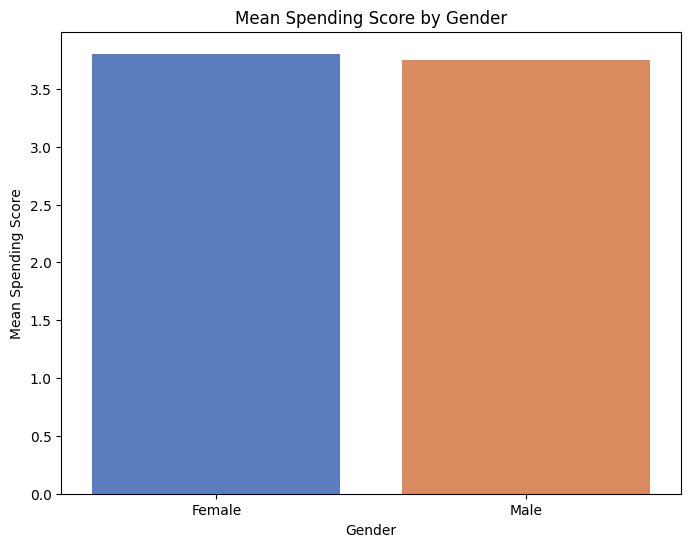

In [41]:
gender_spending = df.groupby('Gender')['Spending Score'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_spending, x='Gender', y='Spending Score', palette='muted')
plt.title('Mean Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Spending Score')
plt.show()


The above Demographic Shows That:


1. Despite the Fact that **Number of Female Customer is Less than Male** But the **Average Spending Score of Female is Slightly Greater Than Male Customer**




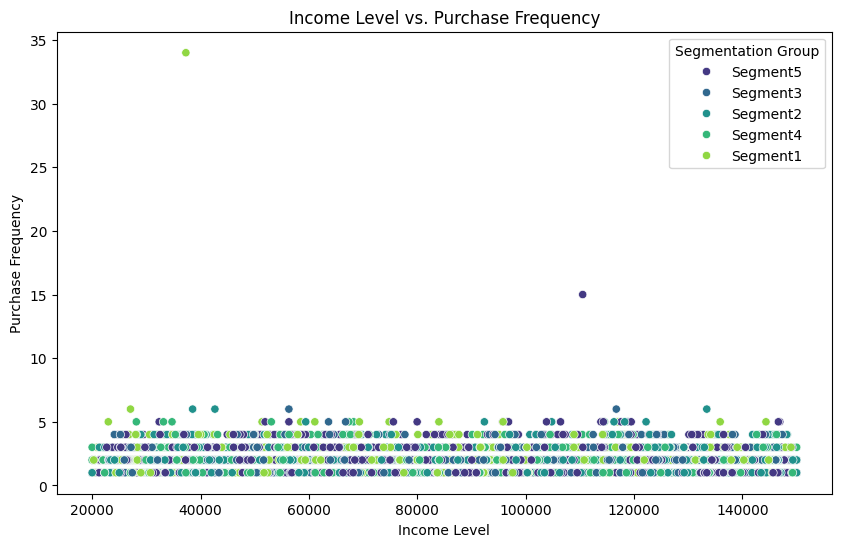

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=without_dup_df, x='Income Level', y='Purchase Frequency', hue='Segmentation Group', palette='viridis')
plt.title('Income Level vs. Purchase Frequency')
plt.xlabel('Income Level')
plt.ylabel('Purchase Frequency')
plt.legend(title='Segmentation Group')
plt.show()


In [43]:
without_dup_df = df.drop_duplicates(subset='Customer ID')

In [44]:
income_purchase_max = without_dup_df["Income Level"].max()
income_purchase_min = without_dup_df["Income Level"].min()

bin_width = 10000

income_bins = np.arange(income_purchase_min, income_purchase_max + bin_width, bin_width)
income_labels = [f"{int(i)}-{int(i + bin_width)}" for i in income_bins[:-1]]

without_dup_df['Income Category'] = pd.cut(df['Income Level'], bins=income_bins, labels=income_labels, right=False)

income_purchase = without_dup_df.groupby('Income Category')['Purchase Frequency'].mean().reset_index()


<ipython-input-44-4390140c4526>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_dup_df['Income Category'] = pd.cut(df['Income Level'], bins=income_bins, labels=income_labels, right=False)
<ipython-input-44-4390140c4526>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_purchase = without_dup_df.groupby('Income Category')['Purchase Frequency'].mean().reset_index()


In [45]:
without_dup_df

,index,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,...,Preferred Language,Segmentation Group,Purchase Frequency,Policy Score,Policy Type Weight,Days Since Purchase,Purchase Recency Score,Instance Spending Score,Spending Score,Income Category
0,0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,...,English,Segment5,1,2,2,2433,0.000411,2.370879,2.370879,70001-80001
1,1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,...,French,Segment5,1,1,2,2223,0.000450,4.732179,4.732179,50001-60001
2,2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,...,German,Segment3,2,3,2,1281,0.000780,4.359897,4.087728,70001-80001
3,3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,...,French,Segment3,1,2,3,2288,0.000437,4.949588,4.949588,60001-70001
4,4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,...,English,Segment2,4,4,3,2280,0.000438,5.244203,3.795932,30001-40001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53487,53487,87569,47,Male,Married,Doctorate,Telangana,Teacher,109500,policy3,...,French,Segment5,1,2,3,1676,0.000596,2.614240,2.614240,100001-110001
53490,53490,39601,50,Male,Divorced,Doctorate,Meghalaya,Teacher,88741,policy5,...,French,Segment5,1,4,2,1305,0.000766,3.115653,3.115653,80001-90001
53497,53497,44828,24,Female,Married,Master's Degree,Sikkim,Teacher,121533,policy4,...,French,Segment3,1,2,2,906,0.001103,2.052384,2.052384,120001-130001
53500,53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,...,French,Segment4,1,1,1,2202,0.000454,4.070309,4.070309,40001-50001


In [46]:
income_purchase

,Income Category,Purchase Frequency
0,20001-30001,1.330074
1,30001-40001,1.334971
2,40001-50001,1.330243
3,50001-60001,1.327571
4,60001-70001,1.336124
5,70001-80001,1.315009
6,80001-90001,1.326002
7,90001-100001,1.307152
8,100001-110001,1.325244
9,110001-120001,1.339808


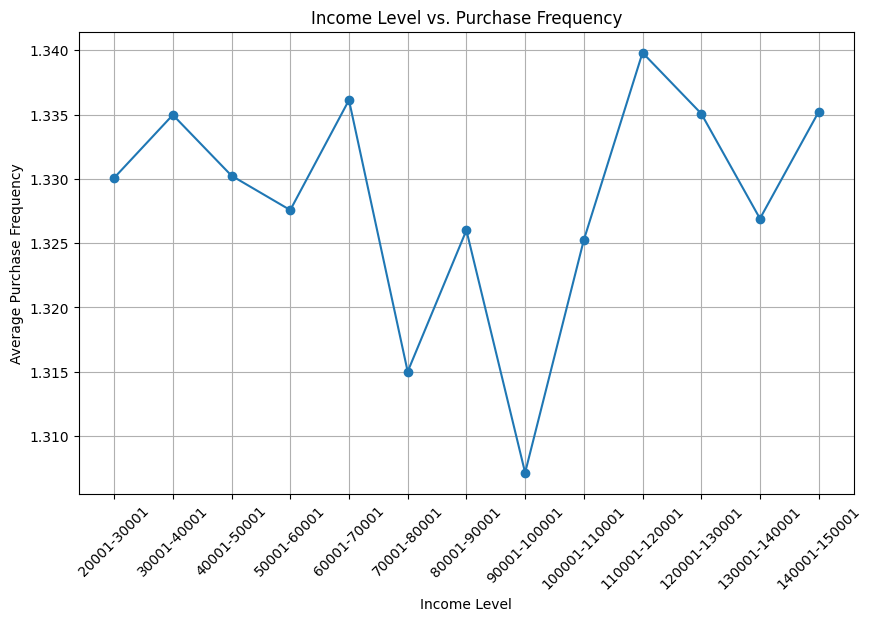

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(income_purchase['Income Category'], income_purchase['Purchase Frequency'], marker='o')
plt.title('Income Level vs. Purchase Frequency')
plt.xlabel('Income Level')
plt.ylabel('Average Purchase Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The Above Demographics Shows That:


1. The observation that **there is no proper pattern in spending of customers belonging to a certain income range** indicates that customer spending behavior is not directly correlated or predictable based on income levels alone.



<ipython-input-48-a4c14397a346>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=marital_status_group, x='Marital Status', y='Spending Score', palette='coolwarm')


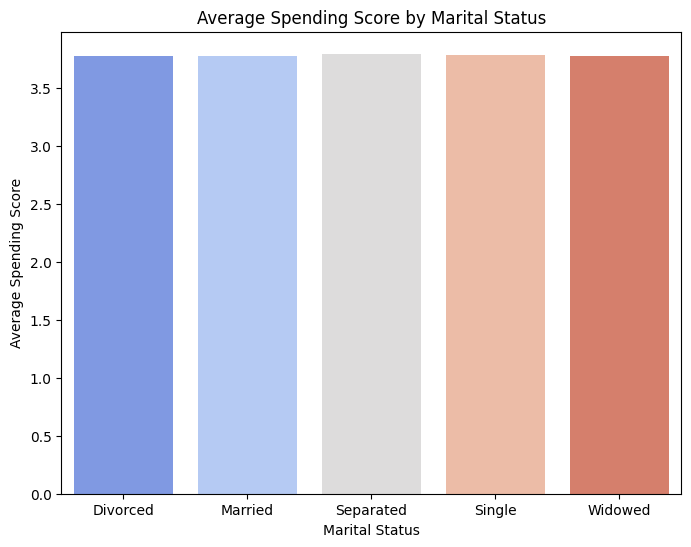

In [48]:
marital_status_group = without_dup_df.groupby('Marital Status')['Spending Score'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=marital_status_group, x='Marital Status', y='Spending Score', palette='coolwarm')
plt.title('Average Spending Score by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Spending Score')
plt.show()


The Above Demographic Shows That:


1.   The observation that **there is no significant difference between customers having different relationship status**.


<ipython-input-49-b57f3335af25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_dup_df['Age Range'] = pd.cut(without_dup_df['Age'], bins=age_bins, labels=age_labels, right=False)
<ipython-input-49-b57f3335af25>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_group = without_dup_df.groupby('Age Range')['Spending Score'].mean().reset_index()
<ipython-input-49-b57f3335af25>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

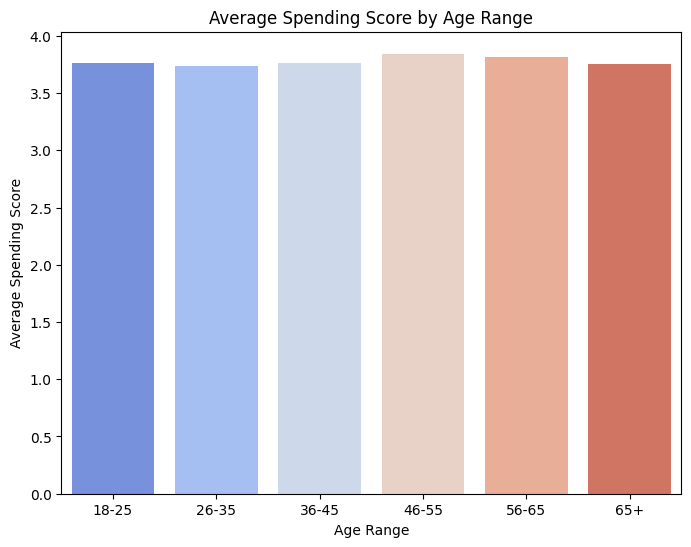

In [49]:
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
without_dup_df['Age Range'] = pd.cut(without_dup_df['Age'], bins=age_bins, labels=age_labels, right=False)

age_range_group = without_dup_df.groupby('Age Range')['Spending Score'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=age_range_group, x='Age Range', y='Spending Score', palette='coolwarm')
plt.title('Average Spending Score by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Spending Score')
plt.show()


The Above Demographic Shows That:


1. The **Cutomers Belong To Every Age Class** there is no any specific age group of Customers Except Age Group having **46-65 has Slightly High Spending**.


<ipython-input-50-3dd953337caf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segmentation_spending, x='Segmentation Group', y='Spending Score', palette='viridis')


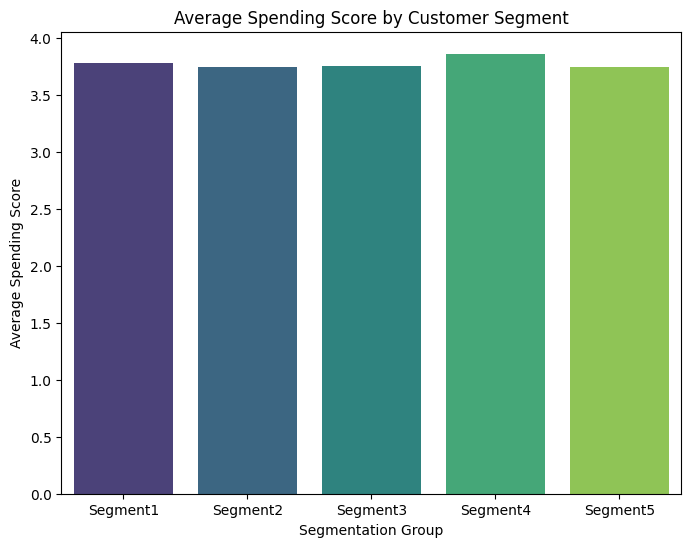

In [50]:
segmentation_spending = without_dup_df.groupby('Segmentation Group')['Spending Score'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=segmentation_spending, x='Segmentation Group', y='Spending Score', palette='viridis')
plt.title('Average Spending Score by Customer Segment')
plt.xlabel('Segmentation Group')
plt.ylabel('Average Spending Score')
plt.show()


The Above Demographic Shows That:


1. The Average **Spending Score of Segment 4 is slightly Greater** than Other Segment Customer.
2. **Segment 1, Segment 3,Segment 4 and Segment 5** has approximately **Similar Average Spending Score**



In [51]:
df['Spending Score'].isna().sum()

0

In [52]:
missing_values = without_dup_df.groupby('Insurance Products Owned')['Spending Score'].apply(lambda x: x.isna().sum())
print(missing_values)


Insurance Products Owned
policy1    0
policy2    0
policy3    0
policy4    0
policy5    0
Name: Spending Score, dtype: int64


<ipython-input-53-8e74ef72a578>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_spending, x='Insurance Products Owned', y='Spending Score', palette='viridis')


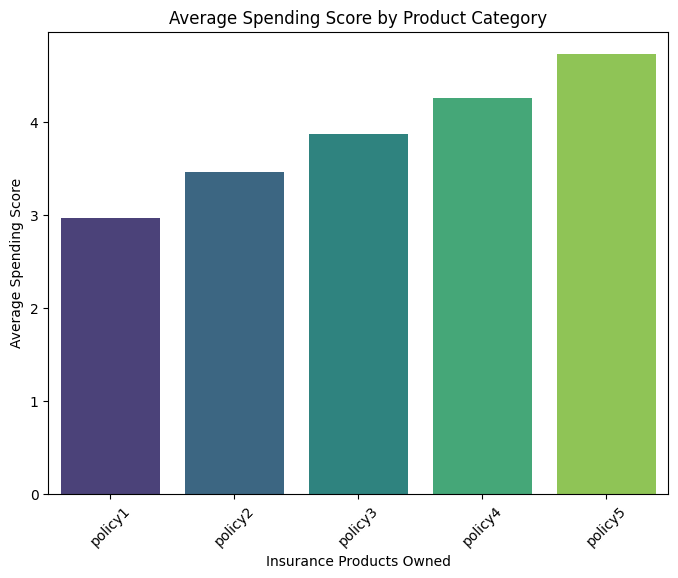

In [53]:
product_spending = without_dup_df.groupby('Insurance Products Owned')['Spending Score'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=product_spending, x='Insurance Products Owned', y='Spending Score', palette='viridis')
plt.title('Average Spending Score by Product Category')
plt.xlabel('Insurance Products Owned')
plt.ylabel('Average Spending Score')
plt.xticks(rotation=45)
plt.show()


The Above Demographic Shows That:


1. The Spending Score of Cutomer **increases as the Policy**



In [54]:
product_spending

,Insurance Products Owned,Spending Score
0,policy1,2.969090
1,policy2,3.465405
2,policy3,3.873906
3,policy4,4.258510
4,policy5,4.735625


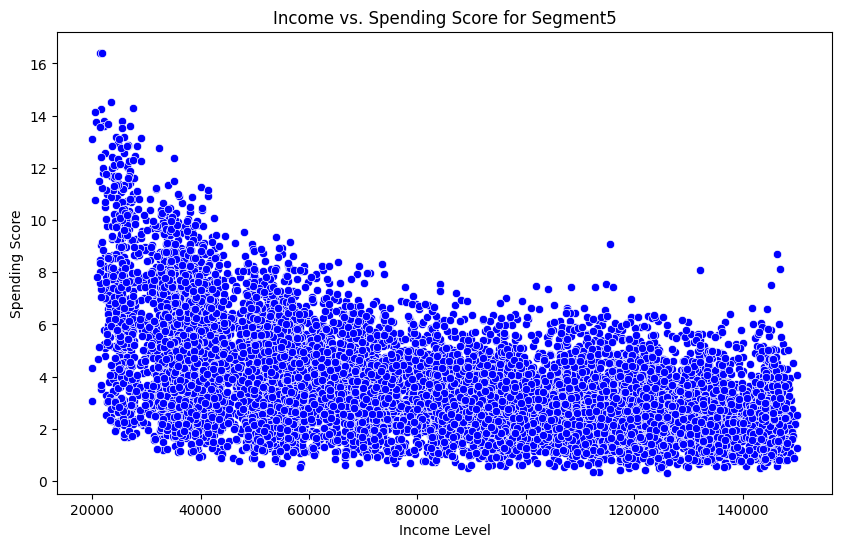

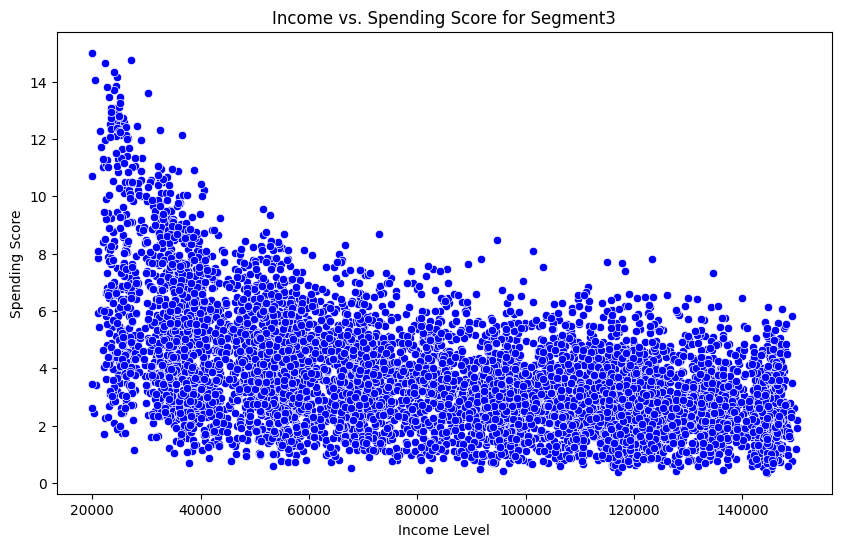

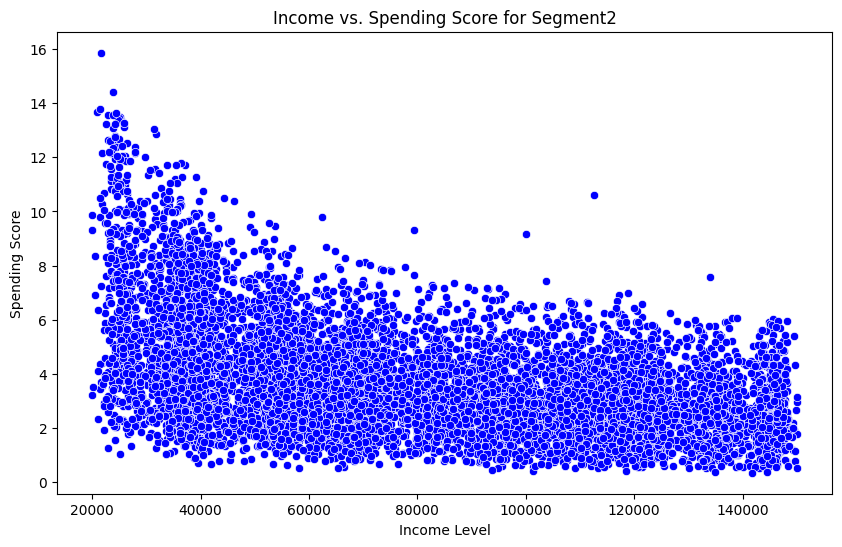

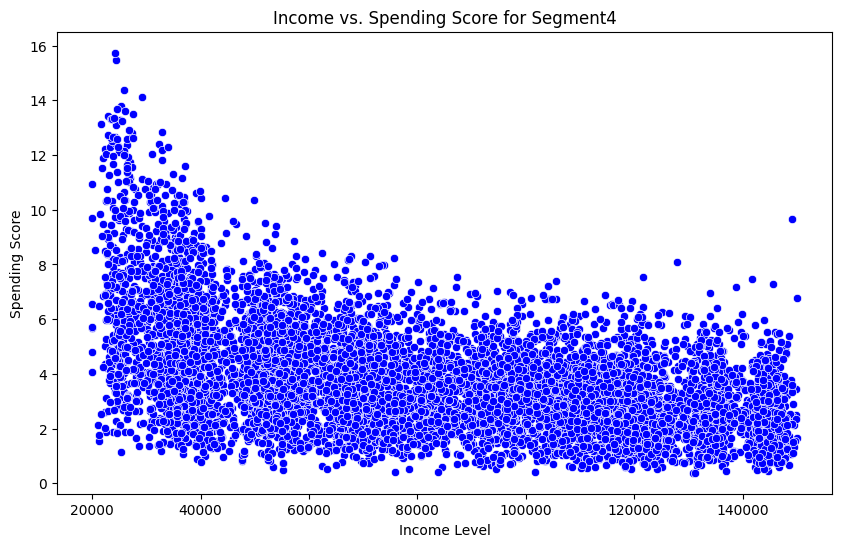

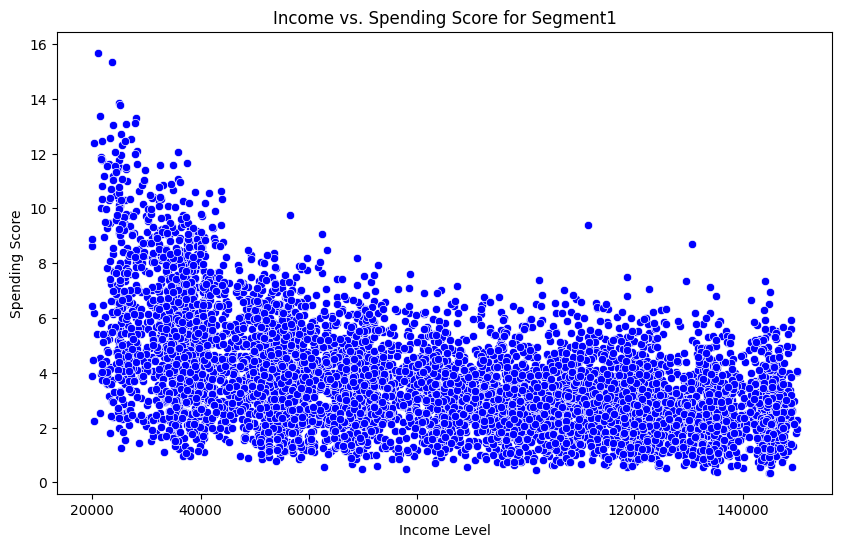

In [55]:
segments = without_dup_df['Segmentation Group'].unique()

for segment in segments:
    segment_data = without_dup_df[without_dup_df['Segmentation Group'] == segment]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=segment_data, x='Income Level', y='Spending Score', color='blue')
    plt.title(f'Income vs. Spending Score for {segment}')
    plt.xlabel('Income Level')
    plt.ylabel('Spending Score')
    plt.show()


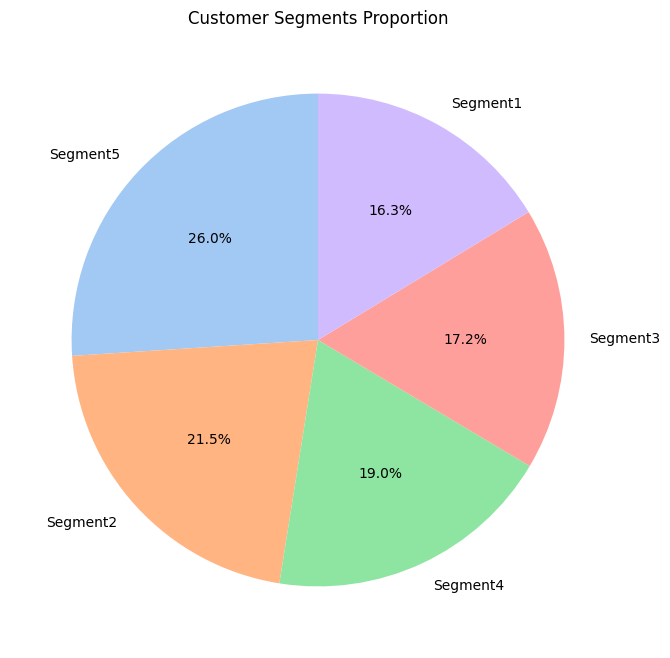

In [56]:
segment_counts = without_dup_df['Segmentation Group'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Customer Segments Proportion')
plt.show()


The Above Demographic Shows That:


1. **47.5% of customers belong to Segment 2 and Segment 5:** This suggests that these two segments make up the largest portions of your customer base, each contributing significantly to the overall customer pool. Understanding the characteristics of these segments could be important for targeted marketing or customer retention strategies.
2. **Segment 1, Segment 3, and Segment 4 segments contribute to the remaining percentage of customers**. While each of these segments may represent a smaller portion of the overall customer base, they can still offer valuable insights into niche customer behaviors, preferences, or unmet needs.

